In [2]:
import pymiere

from pymiere import wrappers

# check that a project is opened
project_opened, sequence_active = wrappers.check_active_sequence(crash=False)
if not project_opened:
    raise ValueError("please open a project")

project = pymiere.objects.app.project

# open sequences in UI if none are active
if not sequence_active:
    sequences = wrappers.list_sequences()
    for seq in sequences:
        project.openSequence(sequenceID=seq.sequenceID)
    project.activeSequence = sequences[0]  # set the first sequence in the list as active

# list all videos clip in the active sequence
clips = wrappers.list_video(project.activeSequence)

# get sequence fps (timebase in ticks to be converted to frame per seconds)
fps = 1/(float(project.activeSequence.timebase)/wrappers.TICKS_PER_SECONDS)
print("Sequence as a framerate of {} fps".format(fps))

Track : Vídeo 1
name videoplayback.mp4
path C:\Users\Carlos\Videos\TikTok\12. Swapping\videoplayback.mp4
duration 5.84
start 0
in 0
out 5.84
end 5.84

name dotcsv cyclegan.mp4
path C:\Users\Carlos\Videos\TikTok\11. CycleGAN\dotcsv cyclegan.mp4
duration 7.84
start 5.84
in 118.12
out 125.96
end 13.68

name Color mate
path 
duration 7.2
start 13.68
in 3600
out 3607.2
end 20.88

name 1_XI3beonBnOwp-y5BwNOqCw.gif
path C:\Users\Carlos\Videos\TikTok\12. Swapping\1_XI3beonBnOwp-y5BwNOqCw.gif
duration 4.32
start 20.88
in 0
out 4.32
end 25.2

name videoplayback.mp4
path C:\Users\Carlos\Videos\TikTok\12. Swapping\videoplayback.mp4
duration 38.56
start 25.2
in 19.44
out 58
end 63.76

Track : Vídeo 2
name VanGogh-starry_night_-1889.jpg
path C:\Users\Carlos\Videos\TikTok\12. Swapping\VanGogh-starry_night_-1889.jpg
duration 7.2
start 13.68
in 3600.24
out 3607.44
end 20.88

Track : Vídeo 3
name 1_Fe6z8VdUS6laTd6Ev3EohQ.gif
path C:\Users\Carlos\Desktop\1_Fe6z8VdUS6laTd6Ev3EohQ.gif
duration 2.84
start 1

In [3]:
pathFile = 'C:\\Users\\Carlos\\Videos\\TikTok\\2. Aprendizaje Reforzado\\Adobe Premiere Pro Captured Audio\\TikTok - Aprendizaje Reforzado\\Audio 1_171.wav'

# Abrimos en el proyecto el archivo de video deseado.
pymiere.objects.app.sourceMonitor.openFilePath(pathFile)

True

In [24]:
from moviepy.video.io.VideoFileClip import VideoFileClip

videoclip = VideoFileClip(pathFile) 
audioclip = videoclip.audio

In [4]:
audioclip.write_audiofile('./output/audiofile.wav')

NameError: name 'audioclip' is not defined

In [5]:
import librosa as lb
import numpy as np
import matplotlib.pyplot as plt

y, sr = lb.load(pathFile, sr=None)

In [15]:
f = 0
secs = 200
sy = y[(f) * secs * sr:(f + 1) * secs * sr]

sy = y

# lb.display.waveplot(sy, sr)
# plt.ylim((-1, 1))
# plt.show()

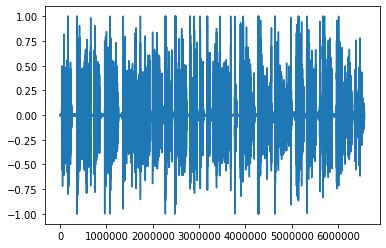

In [17]:
plt.plot(sy)

In [18]:
sr

48000

In [46]:
win_s = sr
thres = 0.2

cut_points = np.array([0]) # Añadido inpoint inicial.
is_lower   = False 

for i in np.arange(0, sy.shape[0], win_s):
    # Seleccionamos los datos dentro de la ventana.
    sub_y = sy[i:(win_s + i)]
    # Si estamos por debajo del umbral, y veníamos de arriba...
    if np.max(np.abs(sub_y)) <= thres:
        
        if not is_lower: 
            # Guardamos el sample rate.
            cut_points = np.append(cut_points, i)
            is_lower = True
            
    elif is_lower:
        is_lower = False
        cut_points = np.append(cut_points, i)
        
print(cut_points.shape)

(26,)


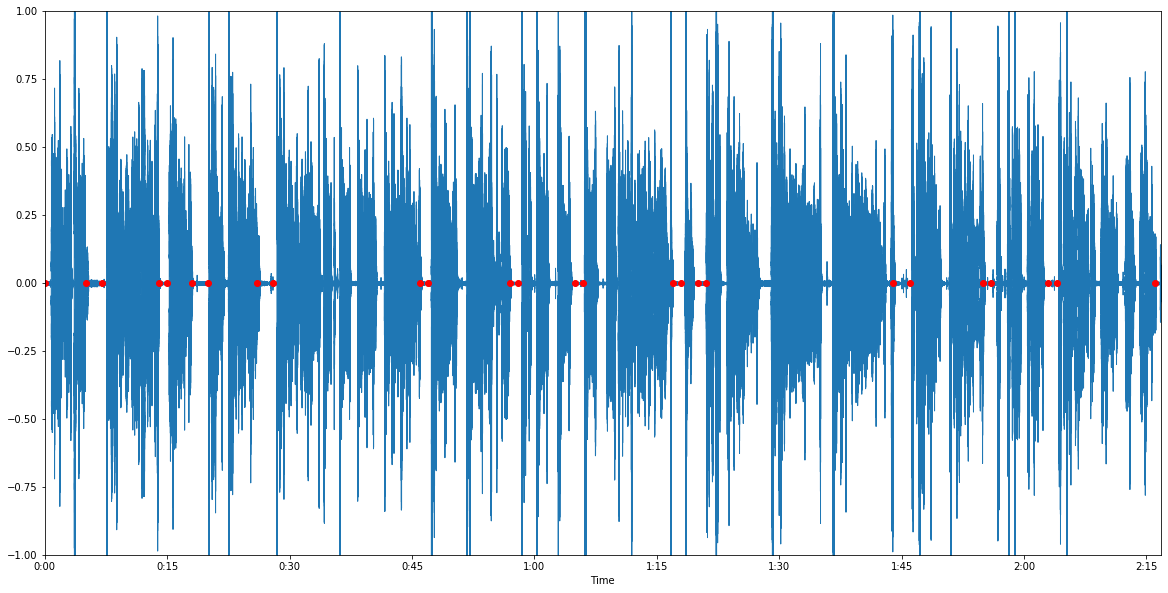

In [47]:
from librosa.display import waveplot

plt.figure(figsize=(20, 10))        
lb.display.waveplot(sy, sr)
plt.scatter(cut_points / sr, np.zeros(len(cut_points)), c="red")
plt.ylim((-1, 1))
plt.show()

In [27]:
project.rootItem.children[-1].name

'Audio 1_171.wav'

In [48]:
ts = 0
clip = project.rootItem.children[-1]

to_remove = True

for i in range(len(cut_points) - 1):

        inP = cut_points[i]   / sr
        ouP = cut_points[i+1] / sr

        print(inP, ouP)

        clip.setInPoint(inP,  4)
        clip.setOutPoint(ouP, 4)

        project.activeSequence.videoTracks[0].insertClip(clip, ts)

        ts += (ouP - inP)

0.0 5.0
5.0 7.0
7.0 14.0
14.0 15.0
15.0 18.0
18.0 20.0
20.0 26.0
26.0 28.0
28.0 46.0
46.0 47.0
47.0 57.0
57.0 58.0
58.0 65.0
65.0 66.0
66.0 77.0
77.0 78.0
78.0 80.0
80.0 81.0
81.0 104.0
104.0 106.0
106.0 115.0
115.0 116.0
116.0 123.0
123.0 124.0
124.0 136.0
